# pyResToolbox - Documented Examples

This notebook contains every documented code example from the pyResToolbox API reference, organized by module. Each cell is self-contained and demonstrates the usage of a specific function.

---
## 1. Gas PVT & Flow

Gas property calculations supporting hydrocarbon + impurity mixtures (CO2, H2S, N2, H2).

### Calculation Methods
- **zmethod**: `'DAK'` (default), `'HY'`, `'WYW'`, `'BUR'`
- **cmethod**: `'PMC'` (default), `'SUT'`, `'BUR'`

In [1]:
import numpy as np
from pyrestoolbox import gas

### gas_z - Gas Z-Factor

Calculating gas Z-Factor of pure methane using DAK and PMC for critical properties

In [2]:
gas.gas_z(p=2350, sg=0.68, degf=180, zmethod='DAK', cmethod='PMC')

np.float64(0.8785399927100872)

Calculating gas Z-Factor of pure CO2

In [3]:
gas.gas_z(p=2350, sg=0.68, degf=180, co2=1.0, zmethod='BUR', cmethod='BUR')

0.5258309021348752

Calculating gas SG, and then gas Z-Factor of a mixture of 5% CO2, 10% H2S, 0% N2 and 20% H2 (remainder natural gas with MW = 19)

In [4]:
gsg = gas.gas_sg(hc_mw=19.0, co2=0.05, h2s=0.10, n2=0, h2=0.20)
print('Gas SG:', gsg)
gas.gas_z(p=2350, sg=gsg, degf=180, co2=0.05, h2s=0.10, n2=0, h2=0.20, zmethod='BUR', cmethod='BUR')

Gas SG: 0.6338246461857093


0.9048153036714465

Using class objects instead of string method selection

In [5]:
gas.gas_z(p=2350, sg=0.68, degf=180, zmethod=gas.z_method.DAK, cmethod=gas.c_method.PMC)

np.float64(0.8785399927100872)

### gas_sg - Mixture Gas Specific Gravity

Calculate SG of a gas mixture containing impurities. Essential for BNS/BUR method inputs.

In [6]:
# Pure hydrocarbon gas (MW = 19)
print('Pure HC gas SG:', gas.gas_sg(hc_mw=19.0, co2=0, h2s=0, n2=0, h2=0))

# 20% H2 blend with natural gas
print('20% H2 blend SG:', gas.gas_sg(hc_mw=19.0, co2=0.05, h2s=0.10, n2=0, h2=0.20))

# Pure CO2
print('Pure CO2 SG:', gas.gas_sg(hc_mw=19.0, co2=1.0, h2s=0, n2=0, h2=0))

# High H2 blend (50% H2)
print('50% H2 blend SG:', gas.gas_sg(hc_mw=19.0, co2=0, h2s=0, n2=0, h2=0.50))

Pure HC gas SG: 0.6558508802209182
20% H2 blend SG: 0.6338246461857093
Pure CO2 SG: 1.5191577493959267
50% H2 blend SG: 0.3627200552295478


### gas_tc_pc - Gas Critical Properties

In [7]:
gas.gas_tc_pc(sg=0.7, co2=0.15)

(np.float64(363.9387708314338), np.float64(738.3190067714969))

In [8]:
# With user-specified Tc and SUT method
gas.gas_tc_pc(sg=0.7, co2=0.15, tc=365, cmethod='SUT')

(365, 709.2356299485114)

In [9]:
# BUR critical properties for a gas with 10% CO2 and 5% H2S
gas.gas_tc_pc(sg=0.75, co2=0.10, h2s=0.05, cmethod='BUR')

(np.float64(367.7134378200891), np.float64(666.8086322837681))

In [10]:
# BUR auto-selects when H2 is present
gas.gas_tc_pc(sg=0.6, h2=0.30)

(np.float64(422.51561076269365), np.float64(659.7065354531829))

### gas_z - Z-Factor with various methods and impurities

In [11]:
# DAK method (default) with N2 and CO2
gas.gas_z(p=1000, sg=0.75, degf=160, n2=0.02, co2=0.17)

np.float64(0.9138558878125714)

In [12]:
# HY method
gas.gas_z(p=1000, sg=0.75, degf=160, n2=0.02, co2=0.17, zmethod='HY')

np.float64(0.9142136711443208)

In [13]:
# Array of pressures with SUT critical property method
gas.gas_z(p=[1000, 2000], sg=0.75, degf=160, cmethod='SUT', n2=0.02, co2=0.17)

array([0.91900003, 0.87160514])

BUR/BNS Z-Factor across a pressure range for different gas compositions. The BNS model uses a tuned 5-component Peng Robinson EOS that natively handles CO2, H2S, N2, and H2 at any concentration up to pure inerts.

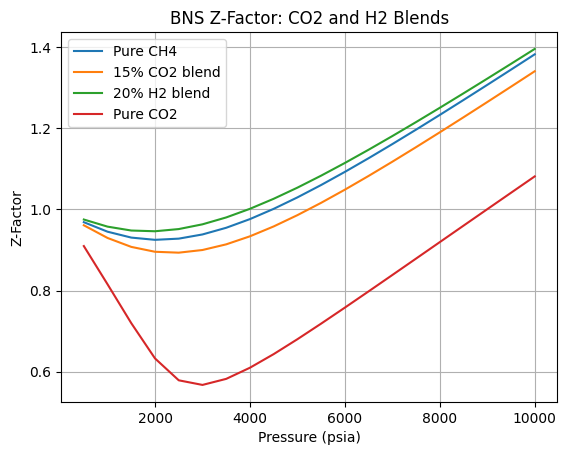

In [14]:
import matplotlib.pyplot as plt

# Compare Z-factor across pressures for different gas compositions using BUR
pressures = list(range(500, 10001, 500))

# Pure methane (BUR)
z_ch4 = gas.gas_z(p=pressures, sg=0.5539, degf=200, zmethod='BUR', cmethod='BUR')

# 15% CO2 blend
z_co2 = gas.gas_z(p=pressures, sg=0.7, degf=200, co2=0.15, zmethod='BUR', cmethod='BUR')

# 20% H2 blend (auto-selects BUR)
sg_h2 = gas.gas_sg(hc_mw=19.0, co2=0, h2s=0, n2=0, h2=0.20)
z_h2 = gas.gas_z(p=pressures, sg=sg_h2, degf=200, h2=0.20, zmethod='BUR', cmethod='BUR')

# Pure CO2
z_pureco2 = gas.gas_z(p=pressures, sg=1.5196, degf=200, co2=1.0, zmethod='BUR', cmethod='BUR')

plt.plot(pressures, z_ch4, label='Pure CH4')
plt.plot(pressures, z_co2, label='15% CO2 blend')
plt.plot(pressures, z_h2, label='20% H2 blend')
plt.plot(pressures, z_pureco2, label='Pure CO2')
plt.xlabel('Pressure (psia)')
plt.ylabel('Z-Factor')
plt.title('BNS Z-Factor: CO2 and H2 Blends')
plt.legend()
plt.grid(True)
plt.show()

### gas_ug - Gas Viscosity

In [15]:
gas.gas_ug(p=1000, sg=0.75, degf=180, zmethod='HY', cmethod='SUT')

0.014118890100250796

In [16]:
gas.gas_ug(p=1000, sg=0.75, degf=180)

0.014110092961853301

BUR viscosity uses a tuned LBC (Lohrenz-Bray-Clark) method instead of the default Lee-Gonzalez-Eakin, enabling viscosity calculations for CO2-rich and H2-rich gases.

Pure CO2 viscosity: 0.027679216789918547
20% H2 blend viscosity: 0.014834741444853035


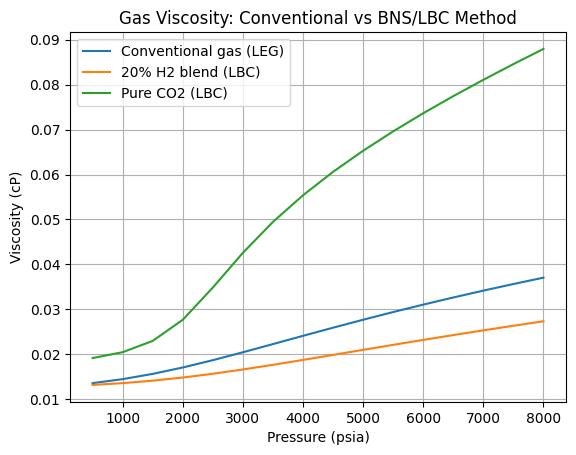

In [17]:
# BUR/LBC viscosity for pure CO2
print('Pure CO2 viscosity:', gas.gas_ug(p=2000, sg=1.5196, degf=200, co2=1.0, zmethod='BUR', cmethod='BUR'))

# Viscosity of a 20% H2 blend (BUR auto-selects)
sg_h2mix = gas.gas_sg(hc_mw=19.0, co2=0, h2s=0, n2=0, h2=0.20)
print('20% H2 blend viscosity:', gas.gas_ug(p=2000, sg=sg_h2mix, degf=200, h2=0.20))

# Viscosity comparison across pressure range for conventional vs H2 blend
pressures = list(range(500, 8001, 500))
ug_conv = gas.gas_ug(p=pressures, sg=0.7, degf=200)
ug_h2 = gas.gas_ug(p=pressures, sg=sg_h2mix, degf=200, h2=0.20, zmethod='BUR', cmethod='BUR')
ug_co2 = gas.gas_ug(p=pressures, sg=1.5196, degf=200, co2=1.0, zmethod='BUR', cmethod='BUR')

plt.plot(pressures, ug_conv, label='Conventional gas (LEG)')
plt.plot(pressures, ug_h2, label='20% H2 blend (LBC)')
plt.plot(pressures, ug_co2, label='Pure CO2 (LBC)')
plt.xlabel('Pressure (psia)')
plt.ylabel('Viscosity (cP)')
plt.title('Gas Viscosity: Conventional vs BNS/LBC Method')
plt.legend()
plt.grid(True)
plt.show()

### gas_cg - Gas Compressibility

In [18]:
gas.gas_cg(p=2000, sg=0.68, degf=120, co2=0.05)

0.0005374854430839333

In [19]:
# Array of pressures
gas.gas_cg(p=np.array([1000, 2000]), sg=0.68, degf=120, co2=0.05)

array([0.00110369, 0.00053749])

In [20]:
# Gas compressibility for pure CO2 and H2 blend using BUR
print('Cg pure CO2:', gas.gas_cg(p=2000, sg=1.5196, degf=200, co2=1.0, zmethod='BUR', cmethod='BUR'))

sg_h2 = gas.gas_sg(hc_mw=19.0, co2=0, h2s=0, n2=0, h2=0.20)
print('Cg 20% H2 blend:', gas.gas_cg(p=2000, sg=sg_h2, degf=200, h2=0.20, zmethod='BUR', cmethod='BUR'))

Cg pure CO2: 0.0007360922883967028
Cg 20% H2 blend: 0.0004957724879791642


### gas_bg - Gas Formation Volume Factor

In [21]:
gas.gas_bg(p=3000, sg=0.78, degf=240)

0.005927563975073749

In [22]:
# Inverse Bg (expansion factor) for array of pressures
1 / gas.gas_bg(p=[3000, 5000], sg=0.78, degf=240)

array([168.70336688, 249.54573283])

In [23]:
# Bg for pure CO2 using BUR
print('Bg pure CO2:', gas.gas_bg(p=3000, sg=1.5196, degf=200, co2=1.0, zmethod='BUR', cmethod='BUR'))

# Bg for 20% H2 blend
sg_h2 = gas.gas_sg(hc_mw=19.0, co2=0, h2s=0, n2=0, h2=0.20)
print('Bg 20% H2 blend:', gas.gas_bg(p=3000, sg=sg_h2, degf=200, h2=0.20, zmethod='BUR', cmethod='BUR'))

Bg pure CO2: 0.003529834258124034
Bg 20% H2 blend: 0.0059887362470498065


### gas_den - Gas Density

In [24]:
gas.gas_den(p=2000, sg=0.75, degf=150, zmethod='HY', cmethod='SUT', n2=0.02, co2=0.15, h2s=0.02)

7.736656004563576

In [25]:
# Gas density for pure CO2 using BUR
print('Pure CO2 density:', gas.gas_den(p=2000, sg=1.5196, degf=200, co2=1.0, zmethod='BUR', cmethod='BUR'))

# Gas density for 20% H2 blend - much lighter than conventional gas
sg_h2 = gas.gas_sg(hc_mw=19.0, co2=0, h2s=0, n2=0, h2=0.20)
print('20% H2 blend density:', gas.gas_den(p=2000, sg=sg_h2, degf=200, h2=0.20, zmethod='BUR', cmethod='BUR'))

# Conventional gas density for comparison
print('Conventional gas density:', gas.gas_den(p=2000, sg=0.75, degf=200))

Pure CO2 density: 19.646813844020034
20% H2 blend density: 4.659753336539732
Conventional gas density: 7.069636415667095


### gas_water_content - Saturated Water Vapor in Gas

In [26]:
gas.gas_water_content(p=1500, degf=165)

np.float64(0.6474226409378979)

### gas_ponz2p - Convert P/Z to Pressure

In [27]:
gas.gas_ponz2p(poverz=2500, sg=0.75, degf=165)

np.float64(2081.5489292144775)

In [28]:
gas.gas_ponz2p(poverz=[2500, 5000], sg=0.75, degf=165)

array([2081.54892921, 4856.97983205])

### gas_grad2sg - Invert Gas Gradient to SG

In [29]:
gas.gas_grad2sg(grad=0.0657, p=2500, degf=175)

0.7495803994806547

### gas_dmp - Delta Pseudopressure

In [30]:
# Positive result when p1 < p2
gas.gas_dmp(p1=1000, p2=2000, degf=185, sg=0.78, zmethod='HY', cmethod='SUT', n2=0.05, co2=0.1, h2s=0.02)

np.float64(213690308.9907268)

In [31]:
# Negative result when p1 > p2, using user-specified Tc/Pc
gas.gas_dmp(p1=2000, p2=1000, degf=185, sg=0.78, tc=371, pc=682)

np.float64(-213713909.36339885)

In [32]:
# Pseudopressure for pure CO2 using BUR
print('dmp pure CO2:', gas.gas_dmp(p1=1000, p2=3000, degf=200, sg=1.5196, co2=1.0, zmethod='BUR', cmethod='BUR'))

# Pseudopressure for 20% H2 blend (BUR auto-selects)
sg_h2 = gas.gas_sg(hc_mw=19.0, co2=0, h2s=0, n2=0, h2=0.20)
print('dmp 20% H2 blend:', gas.gas_dmp(p1=1000, p2=3000, degf=200, sg=sg_h2, h2=0.20))

dmp pure CO2: 423597996.7560001
dmp 20% H2 blend: 555907874.9983484


### gas_fws_sg - Full Wellstream Gas SG

In [33]:
gas.gas_fws_sg(sg_g=0.855, cgr=30, api_st=53)

0.937116010334538

### gas_rate_radial - Gas Radial Flow Rate

In [34]:
gas.gas_rate_radial(k=5, h=50, pr=2000, pwf=750, r_w=0.3, r_ext=1500, degf=180, sg=0.75, D=0.01, S=5)

np.float64(2078.9101970773477)

In [35]:
# Array of reservoir pressures
gas.gas_rate_radial(k=1, h=50, pr=[2000, 1000], pwf=750, r_w=0.3, r_ext=1500, degf=180, sg=0.75, D=0.01, S=5)

array([704.29202227, 135.05317439])

In [36]:
# Radial gas flow rate for pure CO2 using BUR
print('Pure CO2 rate:', gas.gas_rate_radial(
    k=5, h=50, pr=2000, pwf=750, r_w=0.3, r_ext=1500, degf=180,
    sg=1.5196, co2=1.0, zmethod='BUR', cmethod='BUR', D=0.01, S=5
))

# Radial gas flow rate for 20% H2 blend
sg_h2 = gas.gas_sg(hc_mw=19.0, co2=0, h2s=0, n2=0, h2=0.20)
print('20% H2 blend rate:', gas.gas_rate_radial(
    k=5, h=50, pr=2000, pwf=750, r_w=0.3, r_ext=1500, degf=180,
    sg=sg_h2, h2=0.20, zmethod='BUR', cmethod='BUR', D=0.01, S=5
))

Pure CO2 rate: 1875.4529883559844
20% H2 blend rate: 2157.799467373724


### gas_rate_linear - Gas Linear Flow Rate

In [37]:
gas.gas_rate_linear(k=0.1, area=50, length=200, pr=2000, pwf=250, degf=180, sg=0.8)

np.float64(8.202200317597859)

In [38]:
# Array of reservoir pressures
gas.gas_rate_linear(k=0.1, area=50, length=200, pr=[2000, 1000, 500], pwf=250, degf=180, sg=0.8)

array([8.20220032, 2.10691337, 0.42685002])

In [39]:
# Linear gas flow rate for pure CO2 using BUR
print('Pure CO2 linear rate:', gas.gas_rate_linear(
    k=0.1, area=50, length=200, pr=2000, pwf=250, degf=180,
    sg=1.5196, co2=1.0, zmethod='BUR', cmethod='BUR'
))

# Linear gas flow rate for 20% H2 blend
sg_h2 = gas.gas_sg(hc_mw=19.0, co2=0, h2s=0, n2=0, h2=0.20)
print('20% H2 blend linear rate:', gas.gas_rate_linear(
    k=0.1, area=50, length=200, pr=2000, pwf=250, degf=180,
    sg=sg_h2, h2=0.20, zmethod='BUR', cmethod='BUR'
))

Pure CO2 linear rate: 6.733829021011428
20% H2 blend linear rate: 8.51560738747632


---
## 2. Oil PVT & Flow Rates

Oil property calculations including bubble point, solution GOR, FVF, density, viscosity, and compressibility.

### Calculation Methods
- **pbmethod**: `'VALMC'` (default), `'STAN'`, `'VELAR'`
- **rsmethod**: `'VELAR'` (default), `'STAN'`, `'VALMC'`
- **bomethod**: `'MCAIN'` (default), `'STAN'`
- **denomethod**: `'SWMH'` (default)
- **comethod**: `'EXPLT'` (default)

In [40]:
from pyrestoolbox import oil

### oil_pbub - Bubble Point Pressure

Methods can be specified via string or class object

In [41]:
# Via string
oil.oil_pbub(api=43, degf=185, rsb=2350, sg_g=0.72, pbmethod='STAN')

6406.063846808766

In [42]:
# Via class object
oil.oil_pbub(api=43, degf=185, rsb=2350, sg_g=0.72, pbmethod=oil.pb_method.STAN)

6406.063846808766

### oil_ja_sg - Oil SG from Jacoby Aromaticity

In [43]:
oil.oil_ja_sg(mw=150, ja=0.5)

0.8583666666666667

### oil_twu_props - Twu Critical Properties

Returns (sg, tb_R, tc_R, pc_psia, vc_ft3_per_lbmol)

In [44]:
oil.oil_twu_props(mw=225, ja=0.5)

(0.8954444444444445,
 np.float64(1068.3961103813851),
 np.float64(1422.4620493584146),
 np.float64(264.23402773211745),
 np.float64(13.498328588856445))

### oil_rs_st - Incremental GOR post Separation

In [45]:
oil.oil_rs_st(psp=114.7, degf_sp=80, api=38)

np.float64(4.176458005559282)

### oil_pbub - Bubble Point Pressure

In [46]:
# Default VALMC method using sg_g
oil.oil_pbub(api=43, degf=185, rsb=2350, sg_g=0.72)

np.float64(5199.2406069808885)

In [47]:
# Standing method using sg_sp
oil.oil_pbub(api=43, degf=185, rsb=2350, sg_sp=0.72, pbmethod='STAN')

6390.281894698239

### oil_rs_bub - Solution GOR at Bubble Point

In [48]:
oil.oil_rs_bub(api=43, degf=185, pb=5179.5, sg_sp=0.72)

1872.666133282599

### oil_rs - Solution GOR at Pressure

In [49]:
# With both pb and rsb specified
oil.oil_rs(api=43, degf=185, sg_sp=0.72, p=3000, pb=5179.5, rsb=2370)

1017.9424383646037

In [50]:
# With rsb only (pb calculated from correlation)
oil.oil_rs(api=43, degf=185, sg_sp=0.72, p=3000, rsb=2370)

np.float64(1010.0669567201218)

In [51]:
# With pb only (rsb calculated from correlation)
oil.oil_rs(api=43, degf=185, sg_sp=0.72, p=3000, pb=5180)

804.2857187814161

In [52]:
# Using Standing method
oil.oil_rs(api=43, degf=185, sg_sp=0.72, p=3000, pb=5180, rsmethod='STAN')

947.1133546937306

### oil_co - Oil Compressibility

In [53]:
# Above bubble point (undersaturated)
oil.oil_co(p=4500, api=47, degf=180, sg_sp=0.72, rsb=2750)

np.float64(0.0007587726853322233)

In [54]:
# Below bubble point (saturated)
oil.oil_co(p=2000, api=47, degf=180, sg_sp=0.72, rsb=2750, pb=4945)

np.float64(0.0009245540028053584)

### oil_deno - Live Oil Density

In [55]:
oil.oil_deno(p=2000, degf=165, rs=1000, rsb=2000, sg_g=0.72, api=38)

np.float64(40.98349866963842)

### oil_bo - Oil Formation Volume Factor

In [56]:
# McCain method (default, density-based)
oil.oil_bo(p=2000, pb=3000, degf=165, rs=1000, rsb=2000, sg_o=0.8, sg_g=0.68)

np.float64(1.5075107735318138)

In [57]:
# Standing method
oil.oil_bo(p=2000, pb=3000, degf=165, rs=1000, rsb=2000, sg_o=0.8, sg_g=0.68, bomethod='STAN')

1.5393786735904431

### oil_viso - Oil Viscosity

In [58]:
oil.oil_viso(p=2000, api=38, degf=165, pb=3500, rs=1000)

0.416858469042502

### make_bot_og - Black Oil Table Generation

In [59]:
results = oil.make_bot_og(pvto=False, pi=4000, api=38, degf=175, sg_g=0.68, pmax=5500, pb=4500, nrows=10, export=False)
df = results['bot']
st_deno = results['deno']
st_deng = results['deng']
res_denw = results['denw']
res_cw = results['cw']
visw = results['uw']
pb = results['pb']
rsb = results['rsb']
rsb_frac = results['rsb_scale']
usat = results['usat']

print(f'Pb: {pb} psia')
print(f'ST Oil Density: {st_deno:.2f} lb/cuft')
print(f'ST Gas Density: {st_deng:.4f} lb/cuft')
print()
df

Pb: 4500 psia
ST Oil Density: 52.06 lb/cuft
ST Gas Density: 0.0520 lb/cuft



,Pressure (psia),Rs (mscf/stb),Bo (rb/stb),Deno (lb/cuft),uo (cP),Co (1/psi),Gas Z (v/v),Bg (rb/mscf,Cg (1/psi),ug (cP),Bw (rb/stb),uw (cP)
0,25.000000,0.013047,1.067959,48.868046,1.689981,0.001144,0.997700,127.573988,0.039308,0.012683,1.027691,0.356024
1,807.142857,0.227359,1.156914,46.819954,0.845317,0.000201,0.932628,3.693689,0.001316,0.013757,1.025168,0.357636
2,1589.285714,0.374089,1.216513,45.639141,0.666785,0.000258,0.888450,1.787036,0.000672,0.015625,1.022690,0.359236
3,2371.428571,0.528795,1.279703,44.501097,0.557722,0.000330,0.874181,1.178403,0.000419,0.018135,1.020254,0.360821
4,3153.571429,0.712389,1.355941,43.248430,0.475190,0.000422,0.889406,0.901570,0.000277,0.021027,1.017860,0.362394
5,3935.714286,0.939673,1.452130,41.827927,0.407981,0.000514,0.926288,0.752358,0.000192,0.024021,1.015507,0.363955
6,4000.000000,0.960694,1.461112,41.703559,0.402994,0.000520,0.930023,0.743252,0.000187,0.024266,1.015316,0.364082
7,4500.000000,1.137901,1.537297,40.700509,0.366631,0.000279,0.961822,0.683257,0.000152,0.026143,1.013834,0.365073
8,4717.857143,1.137901,1.532145,40.837353,0.372751,0.000143,0.976974,0.661973,0.000139,0.026944,1.013193,0.365503
9,5500.000000,1.137901,1.514873,41.302968,0.394722,0.000153,1.036125,0.602215,0.000105,0.029717,1.010918,0.367038


### sg_evolved_gas - SG of Evolved Gas from Oil

In [60]:
oil.sg_evolved_gas(p=2000, degf=185, rsb=2370, api=43, sg_sp=0.72)

0.7872810977386344

### sg_st_gas - SG of Gas post Separator

In [61]:
oil.sg_st_gas(114.7, rsp=1500, api=42, sg_sp=0.72, degf_sp=80)

np.float64(1.1923932340625523)

### sgg_wt_avg - Weighted Average Surface Gas SG

In [62]:
oil.sgg_wt_avg(sg_sp=0.72, rsp=1000, sg_st=1.1, rst=5)

0.7218905472636816

### oil_api / oil_sg - API-SG Conversions

In [63]:
oil.oil_api(sg_value=0.82)

41.0609756097561

In [64]:
oil.oil_sg(api_value=45)

0.8016997167138811

### oil_rate_radial - Oil Radial Flow Rate

In [65]:
# Scalar with Vogel correction
oil.oil_rate_radial(k=20, h=20, pr=1500, pwf=250, r_w=0.3, r_ext=1500, uo=0.8, bo=1.4, vogel=True, pb=1800)

np.float64(213.8147848023242)

In [66]:
# Array of reservoir pressures
oil.oil_rate_radial(k=20, h=20, pr=[1500, 2000], pwf=250, r_w=0.3, r_ext=1500, uo=0.8, bo=1.4, vogel=True, pb=1800)

array([213.8147848 , 376.58731835])

### oil_rate_linear - Oil Linear Flow Rate

In [67]:
oil.oil_rate_linear(k=0.1, area=15000, pr=3000, pwf=500, length=500, uo=0.4, bo=1.5)

np.float64(14.08521246363274)

In [68]:
# Array of permeabilities
oil.oil_rate_linear(k=[0.1, 1, 5, 10], area=15000, pr=3000, pwf=500, length=500, uo=0.4, bo=1.5)

array([  14.08521246,  140.85212464,  704.26062318, 1408.52124636])

---
## 3. Brine PVT

Brine properties with differing degrees of methane or CO2 saturation.

In [69]:
from pyrestoolbox import brine

### brine_props - Methane-saturated Brine Properties

Returns (Bw, Density_sg, Viscosity_cP, Compressibility_1/psi, Rsw_scf/stb)

In [70]:
bw, lsg, visw, cw, rsw = brine.brine_props(p=160, degf=135, wt=1.5, ch4_sat=1.0)
print('Bw:', bw)
print('SGw:', lsg)
print('Visw:', visw)
print('Cw:', cw)
print('Rsw:', rsw)

Bw: 1.0152007040056148
SGw: 0.9950108179684295
Visw: 0.4994004662758671
Cw: 0.0001539690974662865
Rsw: 1.2540982731813703


### CO2_Brine_Mixture - CO2-saturated Brine Properties

Usage example for 5000 psia x 275 deg F and 3% NaCl brine (field units)

In [71]:
mix = brine.CO2_Brine_Mixture(pres=5000, temp=275, ppm=30000, metric=False)
print('Bw [CO2 Sat, Pure, Fresh]:', mix.bw)
print('x [xCO2, xH2O]:', mix.x)
print('y [yCO2, yH2O]:', mix.y)
print('Brine Density [CO2 Sat, Pure, Fresh]:', mix.bDen)
print('Brine Viscosity [CO2 Sat, Pure, Fresh]:', mix.bVis)
print('Rs (scf/stb):', mix.Rs)

Bw [CO2 Sat, Pure, Fresh]: [np.float64(1.108578337107381), np.float64(1.054302417027164), 1.0542033928155845]
x [xCO2, xH2O]: [0.02431225 0.95743209]
y [yCO2, yH2O]: [0.95336714 0.04663286]
Brine Density [CO2 Sat, Pure, Fresh]: [np.float64(0.9756497850304207), np.float64(0.9681645933162211), 0.9476497407774847]
Brine Viscosity [CO2 Sat, Pure, Fresh]: [np.float64(0.2540642424326026), np.float64(0.2293910837579617), np.float64(0.21333778554795774)]
Rs (scf/stb): 177.70043823906343


Usage example for 175 Bara x 85 degC and 0% NaCl brine (metric units)

In [72]:
mix = brine.CO2_Brine_Mixture(pres=175, temp=85)
print('Rs (sm3/sm3):', mix.Rs)

Rs (sm3/sm3): 24.743651168969475


### make_pvtw_table - PVTW Table Generation

In [73]:
result = brine.make_pvtw_table(pi=3000, degf=200, wt=0, ch4_sat=0)
print('Reference Bw:', result['bw_ref'])
print('Reference Cw:', result['cw_ref'])
print('Reference Visw:', result['visw_ref'])
print()
result['table'].head()

Reference Bw: 1.027589195773527
Reference Cw: 3.0887176266534516e-06
Reference Visw: 0.3083544960904146



,Pressure (psia),Bw (rb/stb),Density (sg),Viscosity (cP),Cw (1/psi),Rsw (scf/stb)
0,500.0,1.035785,0.964583,0.303337,0.000003,0.0
1,1000.0,1.034106,0.966149,0.304351,0.000003,0.0
2,1500.0,1.032447,0.967702,0.305361,0.000003,0.0
3,2000.0,1.030809,0.969240,0.306364,0.000003,0.0
4,2500.0,1.029189,0.970765,0.307362,0.000003,0.0


---
## 4. Permeability Layering

Functions to characterize heterogeneity via the Lorenz coefficient and generate permeability distributions.

Two methods available:
- **'EXP'** (default): Exponential formulation
- **'LANG'**: Langmuir formulation

In [74]:
from pyrestoolbox import layer

### lorenz2b - Lorenz Coefficient to Beta

In [75]:
# Langmuir method
layer.lorenz2b(0.75, lrnz_method='LANG')

16.139518537603912

In [76]:
# Exponential method (default)
layer.lorenz2b(0.75)

7.978108090962671

### lorenzfromb - Beta to Lorenz Coefficient

In [77]:
# Langmuir method
layer.lorenzfromb(16.139518537603912, lrnz_method='LANG')

np.float64(0.750000182307895)

In [78]:
# Exponential method (default)
layer.lorenzfromb(7.978108090962671)

np.float64(0.7500000108799212)

### lorenz_from_flow_fraction - Lorenz from Observed Flow/Thickness Fractions

60% of the observed flow comes from 15% of the net thickness

In [79]:
lorenz_factor = layer.lorenz_from_flow_fraction(kh_frac=0.6, phih_frac=0.15)
lorenz_factor

np.float64(0.6759312029093838)

### lorenz_2_flow_frac - Expected Flow Fraction from Lorenz

In [80]:
layer.lorenz_2_flow_frac(lorenz=0.6759312029093838, phih_frac=0.15)

np.float64(0.6000001346893536)

### lorenz_2_layers - Generate Permeability Distribution

In [81]:
# 5 equal-thickness layers with shuffle
layer.lorenz_2_layers(lorenz=0.67, nlayers=5, k_avg=10, shuffle=True)

array([ 0.29499066, 34.9323596 , 10.58944038,  3.21009656,  0.9731128 ])

In [82]:
# Specified phi_h fractions
layer.lorenz_2_layers(lorenz=0.67, k_avg=10, phi_h_fracs=[0.05, 0.5])

array([51.72990694, 14.12556056,  0.77938749])

---
## 5. Simulation Helpers

Simulation-oriented tools including relative permeability tables, aquifer influence functions, and flash calculations.

In [83]:
import matplotlib.pyplot as plt
from pyrestoolbox import simtools

### influence_tables - Van Everdingen-Hurst Aquifer Influence

Calculating ReD = 1.5
Calculating ReD = 2
Calculating ReD = 3
Calculating ReD = 5
Calculating ReD = 10
Calculating ReD = 25
Calculating ReD = 1000


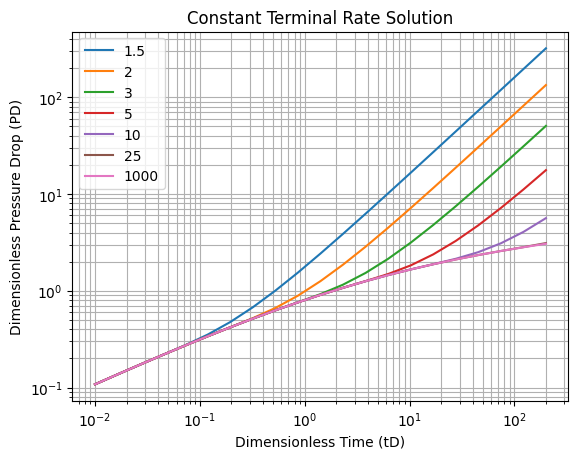

In [84]:
ReDs = [1.5, 2, 3, 5, 10, 25, 1000]
tds, pds = simtools.influence_tables(ReDs=ReDs, export=False)

for p, pd in enumerate(pds):
    plt.plot(tds, pd, label=str(ReDs[p]))

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left')
plt.grid(which='both')
plt.xlabel('Dimensionless Time (tD)')
plt.ylabel('Dimensionless Pressure Drop (PD)')
plt.title('Constant Terminal Rate Solution')
plt.show()

### rr_solver - Rachford-Rice Flash Calculation

Returns (N_iterations, yi_vapor, xi_liquid, V_fraction, L_fraction)

In [85]:
n_it, yi, xi, V, L = simtools.rr_solver(
    zi=np.array([0.7, 0.15, 0.1, 0.05]),
    ki=np.array([50, 5, 0.5, 0.01])
)
print(f'Iterations: {n_it}')
print(f'Vapor compositions (yi): {yi}')
print(f'Liquid compositions (xi): {xi}')
print(f'Vapor fraction (V): {V}')
print(f'Liquid fraction (L): {L}')

Iterations: 6
Vapor compositions (yi): [0.7406252  0.1570315  0.09469948 0.00764382]
Liquid compositions (xi): [0.0148125  0.0314063  0.18939896 0.76438224]
Vapor fraction (V): 0.9440279802330239
Liquid fraction (L): 0.05597201976697608


### rel_perm_table - Relative Permeability Tables

SGOF with LET curves

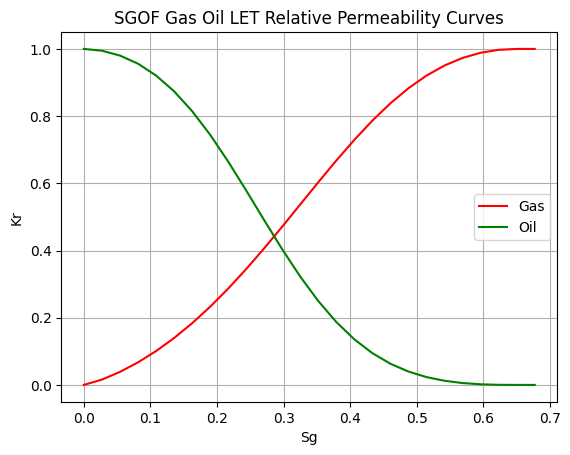

In [86]:
df = simtools.rel_perm_table(
    rows=25, krtable='SGOF', krfamily='LET',
    kromax=1, krgmax=1, swc=0.2, sorg=0.15,
    Lo=2.5, Eo=1.25, To=1.75, Lg=1.2, Eg=1.5, Tg=2.0
)
plt.plot(df['Sg'], df['Krgo'], c='r', label='Gas')
plt.plot(df['Sg'], df['Krog'], c='g', label='Oil')
plt.title('SGOF Gas Oil LET Relative Permeability Curves')
plt.xlabel('Sg')
plt.ylabel('Kr')
plt.legend()
plt.grid('both')
plt.show()

SWOF with Corey curves

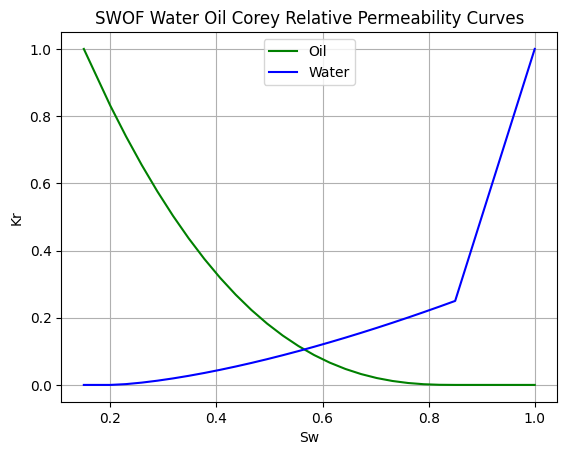

In [87]:
df = simtools.rel_perm_table(
    rows=25, krtable='SWOF',
    kromax=1, krwmax=0.25, swc=0.15, swcr=0.2, sorw=0.15,
    no=2.5, nw=1.5
)
plt.plot(df['Sw'], df['Krow'], c='g', label='Oil')
plt.plot(df['Sw'], df['Krwo'], c='b', label='Water')
plt.title('SWOF Water Oil Corey Relative Permeability Curves')
plt.xlabel('Sw')
plt.ylabel('Kr')
plt.legend()
plt.grid('both')
plt.show()

---
## 6. Component Critical Properties Library

Excel-based component property database with EOS-model-specific parameters (PR79, PR77, SRK, RK).

In [88]:
from pyrestoolbox import library

### prop - Return Critical Property

In [89]:
library.prop(comp='CH4', prop='Pc_psia')

667.029

In [90]:
# Compare VTran for PR79 vs SRK models
library.prop(comp='C3', prop='VTran'), library.prop(comp='C3', prop='VTran', model='SRK')

(-0.06381, 0.09075)

### components - List of Available Components

In [91]:
print(library.components)

['HE', 'HELIUM', 'NE', 'NEON', 'AR', 'ARGON', 'KR', 'KRYPTON', 'XE', 'XEON', 'RN', 'RADON', 'H2', 'HYDROGEN', 'N2', 'NITROGEN', 'CO', 'O2', 'OXYGEN', 'NO', 'N2O', 'CO2', 'H2S', 'NH3', 'AMMONIA', 'SO2', 'NO2', 'N2O4', 'H2O', 'WATER', 'C1', 'CH4', 'METHANE', 'C2', 'C2H6', 'ETHANE', 'C3', 'C3H8', 'PROPANE', 'C-C3', 'CYCLO-C3', 'C-PROPANE', 'CYCLOPROP', 'I-C4', 'ISO-C4', 'I-BUTANE', 'ISOBUTANE', 'N-C4', 'N-BUTANE', 'BUTANE', 'NEO-C5', 'NEOPENTAN', 'C-C4', 'CYCLO-C4', 'C-BUTANE', 'CYCLOBUTA', 'I-C5', 'ISO-C5', 'I-PENTANE', 'ISOPENTAN', 'N-C5', 'N-PENTANE', 'PENTANE', 'C-C5', 'CYCLO-C5', 'C-PENTANE', 'CYCLOPENT', '22DM-C4', '22DM-BUTA', '23DM-C4', '23DM-BUTA', '2M-C5', '2M-PENTAN', '3M-C5', '3M-PENTAN', 'N-C6', 'N-HEXANE', 'HEXANE', 'MC-C5', 'MC-PENTAN', '22DM-C5', '22DM-PENT', 'BENZENE', '24DM-C5', '24DM-PENT', 'C-C6', 'CYCLO-C6', 'C-HEXANE', 'CYCLOHEXA', '223TM-C4', '223TM-BUT', '33DM-C5', '33DM-PENT', '23DM-C5', '23DM-PENT', '2M-C6', '2M-HEXANE', '3M-C6', '3M-HEXANE', '3E-C5', '3E-PENTAN'

### names - Long-form Component Names

In [92]:
print(library.names)

['Helium', 'Helium', 'Neon', 'Neon', 'Argon', 'Argon', 'Krypton', 'Krypton', 'Xenon', 'Xenon', 'Radon', 'Radon', 'Hydrogen', 'Hydrogen', 'Nitrogen', 'Nitrogen', 'Carbon Monoxide', 'Oxygen', 'Oxygen', 'Nitric Oxide', 'Nitrous Oxide', 'Carbon Dioxide', 'Hydrogen Sulfide', 'Ammonia', 'Ammonia', 'Sulfur Dioxide', 'Nitrogen Dioxide', 'Nitrogen Tetroxide', 'Water', 'Water', 'Methane', 'Methane', 'Methane', 'Ethane', 'Ethane', 'Ethane', 'Propane', 'Propane', 'Propane', 'Cyclopropane', 'Cyclopropane', 'Cyclopropane', 'Cyclopropane', 'Isobutane', 'Isobutane', 'Isobutane', 'Isobutane', 'Butane', 'Butane', 'Butane', 'Neopentane', 'Neopentane', 'Cyclobutane', 'Cyclobutane', 'Cyclobutane', 'Cyclobutane', 'Isopentane', 'Isopentane', 'Isopentane', 'Isopentane', 'Pentane', 'Pentane', 'Pentane', 'Cyclopentane', 'Cyclopentane', 'Cyclopentane', 'Cyclopentane', '2,2-Dimethylbutane', '2,2-Dimethylbutane', '2,3-Dimethylbutane', '2,3-Dimethylbutane', '2-Methylpentane', '2-Methylpentane', '3-Methylpentane', '

### property_list - Available Properties

In [93]:
print(library.property_list)

['Name', 'MW', 'Tc_R', 'Pc_psia', 'Zc', 'Pchor', 'Vc_cuft_per_lbmol', 'Acentric', 'VTran', 'Tb_F', 'SpGr']


### models - Available EOS Models

In [94]:
print(library.models)

['PR79', 'PR77', 'SRK', 'RK']


### df - Full Library DataFrame

In [95]:
library.df

,Component,Name,MW,Tc_R,Pc_psia,Zc,Pchor,Vc_cuft_per_lbmol,PR79-Acentric,PR79-VTran,...,PR77-Tb_F,PR77-SpGr,SRK-Acentric,SRK-VTran,SRK-Tb_F,SRK-SpGr,RK-Acentric,RK-VTran,RK-Tb_F,RK-SpGr
0,HE,Helium,4.003,9.3420,32.924,0.30142,19.2,0.91786,-0.39000,-0.26365,...,-452.183,0.06428,-0.39000,-0.04307,-452.122,0.06253,-0.390,-0.31493,-451.5069,0.05845
1,HELIUM,Helium,4.003,9.3420,32.924,0.30142,19.2,0.91786,-0.39000,-0.26365,...,-452.183,0.06428,-0.39000,-0.04307,-452.122,0.06253,-0.390,-0.31493,-451.5069,0.05845
2,NE,Neon,20.180,79.9200,400.304,0.31177,41.3,0.66797,-0.01600,-0.32239,...,-410.688,0.45422,-0.01600,-0.13988,-410.523,0.43717,-0.016,-0.16591,-408.8552,0.43433
3,NEON,Neon,20.180,79.9200,400.304,0.31177,41.3,0.66797,-0.01600,-0.32239,...,-410.688,0.45422,-0.01600,-0.13988,-410.523,0.43717,-0.016,-0.16591,-408.8552,0.43433
4,AR,Argon,39.948,271.5480,710.395,0.29119,74.7,1.19450,-0.00200,-0.18768,...,-302.755,0.48492,-0.00200,-0.02102,-302.083,0.46589,-0.002,-0.04298,-296.5826,0.46326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,N-C30,N-C30,422.822,1527.6142,107.286,0.18003,1231.0,27.50960,1.25643,0.33534,...,840.040,0.81324,1.31245,0.40928,840.040,0.81324,0.000,0.46182,670.3083,0.81324
196,N-C31,N-C31,436.849,1538.3854,103.604,0.17741,1271.0,28.27023,1.29034,0.34181,...,854.897,0.81453,1.35090,0.41488,854.897,0.81453,0.000,0.46753,683.3671,0.81453
197,N-C32,N-C32,450.876,1548.7083,100.153,0.17486,1311.0,29.01676,1.32387,0.34795,...,869.222,0.81572,1.38918,0.42020,869.222,0.81572,0.000,0.47295,696.0598,0.81572
198,N-C33,N-C33,464.903,1558.6141,96.913,0.17237,1351.0,29.74946,1.35703,0.35379,...,883.045,0.81684,1.42731,0.42526,883.045,0.81684,0.000,0.47810,708.4077,0.81684
